### Analysis of classifier results

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#### BERT as a classifier

In [2]:
# read in results

df_results = pd.read_csv("../../../../data/prd/Digital_abstract_labelled/big_data/bertclassifier_new_training_set.csv")
print(df_results.shape)

(1143869, 6)


In [3]:
df_results = df_results.drop(columns=['Unnamed: 0'])

In [4]:
df_results.head()

,PROJECT_ID,ABSTRACT,Is it related to Big-Data,label,classification
0,89996,"This is a project to explore Game-based, Metap...",NaN,NaN,0.0
1,89997,Institution: Franklin Institute Science Museum...,NaN,NaN,0.0
2,89998,Through programs (including small group conver...,NaN,NaN,0.0
3,89999,In partnership with the American Chemical Soci...,NaN,NaN,0.0
4,90001,The Center for Molecular Interfacing (CMI) wil...,NaN,NaN,0.0


In [5]:
df_results['classification'].value_counts()

0.0    1132920
1.0      10949
Name: classification, dtype: int64

In [6]:
df_results['label'].value_counts(0)

Non Big-data    913
Big-data        687
Name: label, dtype: int64

In [7]:
df_results.dtypes

PROJECT_ID                     int64
ABSTRACT                      object
Is it related to Big-Data    float64
label                         object
classification               float64
dtype: object

In [8]:
# get training set, test set, validation set ids

#
# PREP TRAINING, VALIDATION, AND TESTING DATASETS ----------------------------------
#

#data frame with only labeled abstracts - 1600 (new set)
df_lab = pd.read_csv("../../../../data/prd/Digital_abstract_labelled/DEC-2022-labelled_abstracts.csv")
df_lab = df_lab[['PROJECT_ID','ABSTRACT','Is it related to Big-Data','label']]

#data frame with all of the abstracts
df = pd.read_pickle("../../../../data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")
df.reset_index(inplace = True, drop = True)
df = df[['PROJECT_ID','ABSTRACT']]

# merge with the labelled data using PROJECT_ID.
df['PROJECT_ID'] = pd.to_numeric(df['PROJECT_ID'])
df_merge = df.merge(df_lab[['PROJECT_ID','Is it related to Big-Data','label']], how='left', on='PROJECT_ID')

# Save project ID of labelled data
project_id_lab = list(df_lab['PROJECT_ID'])

# Get the index of labelled abstract
subset_df = df_merge.loc[df_merge['PROJECT_ID'].isin(project_id_lab),['PROJECT_ID','label']]

# build training and testing sets from the labeled data - sklearn to find list of indices for training and test set
X_train_idx, X_test_idx, y_train_tfidf, y_test_tfidf = train_test_split(subset_df.index, 
                                                                        subset_df['label'].values, 
                                                                        test_size=0.20, random_state=0, 
                                                                        stratify=subset_df['label'].values)

# create validation index set by splitting test index set into 2
random.seed(1)
temp = random.sample(list(X_test_idx), int(0.5 * len(X_test_idx)))
X_val_idx = list(set(X_test_idx) - set(temp))
X_test_idx = temp

# create train, validation, and test sets
df_train = df_merge.loc[X_train_idx]
df_val = df_merge.loc[X_val_idx]
df_test = df_merge.loc[X_test_idx]

print(len(df_train),len(df_val), len(df_test))


1280 160 160


In [9]:
# df, df_merge, and df_results all have same index

In [10]:
df.head()

,PROJECT_ID,ABSTRACT
0,89996,"This is a project to explore Game-based, Metap..."
1,89997,Institution: Franklin Institute Science Museum...
2,89998,Through programs (including small group conver...
3,89999,In partnership with the American Chemical Soci...
4,90001,The Center for Molecular Interfacing (CMI) wil...


In [11]:
df_merge.head()

,PROJECT_ID,ABSTRACT,Is it related to Big-Data,label
0,89996,"This is a project to explore Game-based, Metap...",NaN,NaN
1,89997,Institution: Franklin Institute Science Museum...,NaN,NaN
2,89998,Through programs (including small group conver...,NaN,NaN
3,89999,In partnership with the American Chemical Soci...,NaN,NaN
4,90001,The Center for Molecular Interfacing (CMI) wil...,NaN,NaN


In [12]:
df_results.head()

,PROJECT_ID,ABSTRACT,Is it related to Big-Data,label,classification
0,89996,"This is a project to explore Game-based, Metap...",NaN,NaN,0.0
1,89997,Institution: Franklin Institute Science Museum...,NaN,NaN,0.0
2,89998,Through programs (including small group conver...,NaN,NaN,0.0
3,89999,In partnership with the American Chemical Soci...,NaN,NaN,0.0
4,90001,The Center for Molecular Interfacing (CMI) wil...,NaN,NaN,0.0


In [13]:
df_test.head()

,PROJECT_ID,ABSTRACT,Is it related to Big-Data,label
1103485,1189983,PROJECT SUMMARY/ABSTRACT Cancer pain is still ...,1.0,Big-data
615012,676733,The Enabling Big Computing for Data Intensive ...,1.0,Big-data
1137144,1274343,"In the mobile and big data era, data on human ...",1.0,Big-data
189763,547215,Background: A paucity of clinical trials for ...,0.0,Non Big-data
223215,293390,Hematopoietic stem cell (HSC) transplantation ...,0.0,Non Big-data


In [14]:
# filter df_results to test set PROJECT_IDs

df_test_results = df_results.loc[X_test_idx]

In [15]:
df_test_results.head()

,PROJECT_ID,ABSTRACT,Is it related to Big-Data,label,classification
1103485,1189983,PROJECT SUMMARY/ABSTRACT Cancer pain is still ...,1.0,Big-data,0.0
615012,676733,The Enabling Big Computing for Data Intensive ...,1.0,Big-data,1.0
1137144,1274343,"In the mobile and big data era, data on human ...",1.0,Big-data,1.0
189763,547215,Background: A paucity of clinical trials for ...,0.0,Non Big-data,0.0
223215,293390,Hematopoietic stem cell (HSC) transplantation ...,0.0,Non Big-data,0.0


In [16]:
df_test_results["predicted_label"] = "Big-data"

In [17]:
df_test_results.loc[df_test_results["classification"] == 0.0, "predicted_label"] = "Non Big-data"

In [18]:
df_test_results.head()

,PROJECT_ID,ABSTRACT,Is it related to Big-Data,label,classification,predicted_label
1103485,1189983,PROJECT SUMMARY/ABSTRACT Cancer pain is still ...,1.0,Big-data,0.0,Non Big-data
615012,676733,The Enabling Big Computing for Data Intensive ...,1.0,Big-data,1.0,Big-data
1137144,1274343,"In the mobile and big data era, data on human ...",1.0,Big-data,1.0,Big-data
189763,547215,Background: A paucity of clinical trials for ...,0.0,Non Big-data,0.0,Non Big-data
223215,293390,Hematopoietic stem cell (HSC) transplantation ...,0.0,Non Big-data,0.0,Non Big-data


In [19]:
df_test_results["classification"].value_counts()

0.0    131
1.0     29
Name: classification, dtype: int64

In [20]:
df_test_results["predicted_label"].value_counts()

Non Big-data    131
Big-data         29
Name: predicted_label, dtype: int64

In [21]:
# Classifier performance
confusion = confusion_matrix(df_test_results['label'], df_test_results['predicted_label'])
print(confusion)
print(classification_report(df_test_results['label'], df_test_results['predicted_label']))

[[28 38]
 [ 1 93]]
              precision    recall  f1-score   support

    Big-data       0.97      0.42      0.59        66
Non Big-data       0.71      0.99      0.83        94

    accuracy                           0.76       160
   macro avg       0.84      0.71      0.71       160
weighted avg       0.82      0.76      0.73       160



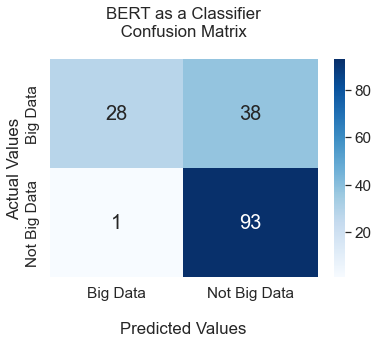

In [22]:
## Display the visualization of the Confusion Matrix.

sns.set(font_scale=1.4)
ax = sns.heatmap(confusion, annot=True, fmt="", cmap='Blues', xticklabels=["Big Data", "Not Big Data"], 
            annot_kws={"fontsize":20})
plt.title('BERT as a Classifier\n Confusion Matrix \n') 
plt.xlabel('\nPredicted Values')
plt.ylabel('Actual Values') 
ax.set_yticklabels(['Big Data', 'Not Big Data'], va='center', rotation = 90) #position=(0,0.28))

plt.savefig('figures/bert_as_classifier.png', bbox_inches='tight')
plt.show()

### SVM with BERT - best classifier - Calculate dollar amounts

In [2]:
#data frame with all of the abstracts
df = pd.read_pickle("../../../../data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")
df.reset_index(inplace = True, drop = True)
print(df.shape)

(1143869, 30)


In [3]:
df.dtypes

PROJECT_ID                     object
ABSTRACT                       object
PROJECT_TERMS                  object
PROJECT_TITLE                  object
DEPARTMENT                     object
AGENCY                         object
IC_CENTER                      object
PROJECT_NUMBER                 object
PROJECT_START_DATE             object
PROJECT_END_DATE               object
CONTACT_PI_PROJECT_LEADER      object
OTHER_PIS                      object
CONGRESSIONAL_DISTRICT         object
DUNS_NUMBER                    object
ORGANIZATION_NAME              object
ORGANIZATION_CITY              object
ORGANIZATION_STATE             object
ORGANIZATION_ZIP               object
ORGANIZATION_COUNTRY           object
BUDGET_START_DATE              object
BUDGET_END_DATE                object
CFDA_CODE                      object
FY                             object
FY_TOTAL_COST                 float64
FY_TOTAL_COST_SUB_PROJECTS    float64
ORG_COUNT                       int64
PI_COUNT    

In [4]:
df_results = pd.read_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/big_data/bert_new_training_set.csv")
print(df_results.shape)

(1143869, 10)


In [5]:
df_results.dtypes

Unnamed: 0                     int64
PROJECT_ID                     int64
ABSTRACT                      object
Is it related to Big-Data    float64
label                         object
Prediction_KNN                object
Prediction_SVM                object
Prediction_DT                 object
Prediction_RF                 object
Prediction_NN                 object
dtype: object

In [6]:
df_results['PROJECT_ID'] = df_results['PROJECT_ID'].astype(str)

In [7]:
df.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,...,NaN,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,...,NaN,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,...,NaN,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,...,NaN,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,...,NaN,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...


In [8]:
df_results.head()

,Unnamed: 0,PROJECT_ID,ABSTRACT,Is it related to Big-Data,label,Prediction_KNN,Prediction_SVM,Prediction_DT,Prediction_RF,Prediction_NN
0,0,89996,"This is a project to explore Game-based, Metap...",NaN,NaN,Non Big-data,Non Big-data,Non Big-data,Non Big-data,Non Big-data
1,1,89997,Institution: Franklin Institute Science Museum...,NaN,NaN,Big-data,Non Big-data,Non Big-data,Non Big-data,Non Big-data
2,2,89998,Through programs (including small group conver...,NaN,NaN,Non Big-data,Non Big-data,Non Big-data,Non Big-data,Non Big-data
3,3,89999,In partnership with the American Chemical Soci...,NaN,NaN,Non Big-data,Non Big-data,Non Big-data,Non Big-data,Non Big-data
4,4,90001,The Center for Molecular Interfacing (CMI) wil...,NaN,NaN,Non Big-data,Non Big-data,Big-data,Non Big-data,Non Big-data


In [9]:
df_merge = df.merge(df_results[['PROJECT_ID', 'Prediction_SVM']], how='left', on='PROJECT_ID')

In [10]:
print(df_merge.shape)

(1143869, 31)


In [11]:
df_merge.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,...,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens,Prediction_SVM
0,89996,"This is a project to explore Game-based, Metap...",Achievement; analog; base; Cognitive Science; ...,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,NSF,NSF,NaN,0814512,9/15/2008,8/31/2012,...,47.076,2008,1999467.0,NaN,1,1,1999467.0,1,project explore game base metaphor enhanced ga...,Non Big-data
1,89997,Institution: Franklin Institute Science Museum...,Active Learning; Child; Computer software; des...,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,NSF,NSF,NaN,0741659,9/15/2008,8/31/2012,...,47.076,2008,1799699.0,NaN,1,1,1799699.0,1,institution franklin institute science museum ...,Non Big-data
2,89998,Through programs (including small group conver...,Address; Age; Birth; Brain; Caregivers; Child;...,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,NSF,NSF,NaN,0813522,9/15/2008,8/31/2011,...,47.076,2008,1505858.0,NaN,1,1,1505858.0,1,program include small group conversation citiz...,Non Big-data
3,89999,In partnership with the American Chemical Soci...,Advanced Development; American; Chemicals; Che...,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,NSF,NSF,NaN,0838627,8/1/2008,12/31/2010,...,47.049,2008,51000.0,NaN,1,1,51000.0,1,partnership american chemical society acs nati...,Non Big-data
4,90001,The Center for Molecular Interfacing (CMI) wil...,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,...,47.049,2008,1519821.0,NaN,1,1,1519821.0,1,center molecular interfacing cmi enable integr...,Non Big-data


In [12]:
df_merge.isnull().sum()

PROJECT_ID                         0
ABSTRACT                           0
PROJECT_TERMS                  46981
PROJECT_TITLE                      1
DEPARTMENT                         0
AGENCY                             0
IC_CENTER                     198070
PROJECT_NUMBER                     0
PROJECT_START_DATE            151060
PROJECT_END_DATE              143183
CONTACT_PI_PROJECT_LEADER      21828
OTHER_PIS                     995097
CONGRESSIONAL_DISTRICT         93555
DUNS_NUMBER                    15185
ORGANIZATION_NAME               1850
ORGANIZATION_CITY              30357
ORGANIZATION_STATE             37046
ORGANIZATION_ZIP               70625
ORGANIZATION_COUNTRY           30145
BUDGET_START_DATE             258598
BUDGET_END_DATE               258790
CFDA_CODE                     195012
FY                                 0
FY_TOTAL_COST                 208196
FY_TOTAL_COST_SUB_PROJECTS    975585
ORG_COUNT                          0
PI_COUNT                           0
F

In [13]:
df_bigdata = df_merge[df_merge['Prediction_SVM']=='Big-data']
print('Number of abstracts related to Big data:', len(df_bigdata))

Number of abstracts related to Big data: 49739


In [24]:
100*len(df_bigdata)/len(df)

4.3483126127205125

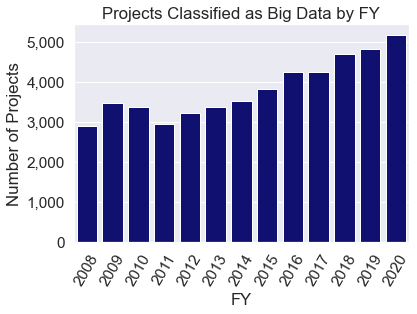

In [14]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots()
sns.countplot(data=df_bigdata, x='FY', color='navy')

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=60)

plt.xlabel("FY")
plt.ylabel("Number of Projects")
plt.title("Projects Classified as Big Data by FY")

plt.savefig("figures/best_results/big_data_numproj_by_year.png", bbox_inches = "tight")

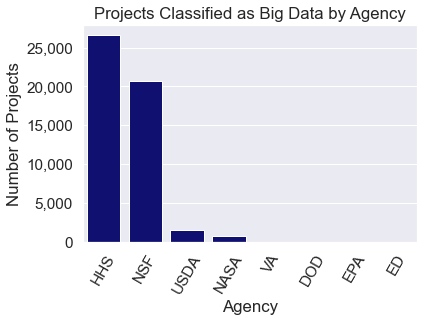

In [15]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots()
sns.countplot(data=df_bigdata, x='DEPARTMENT', color='navy', order = df_bigdata['DEPARTMENT'].value_counts().index)

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=60)

plt.xlabel("Agency")
plt.ylabel("Number of Projects")
plt.title("Projects Classified as Big Data by Agency")

plt.savefig("figures/best_results/big_data_numproj_by_agency.png", bbox_inches = "tight")


In [16]:
# compute dollars per year

dollars_by_year = df_bigdata.groupby(['FY']).agg(COST = ('FY_TOTAL_COST_SUM', 'sum'))
dollars_by_year['FY'] = dollars_by_year.index
dollars_by_year

,COST,FY
FY,,
2008,1.370514e+09,2008
2009,2.142416e+09,2009
2010,2.006890e+09,2010
2011,1.440923e+09,2011
2012,1.439334e+09,2012
2013,1.831050e+09,2013
2014,1.903771e+09,2014
2015,2.161208e+09,2015
2016,2.413731e+09,2016


In [17]:
dollars_by_year['COST'] = dollars_by_year['COST'].values/1000000000

In [18]:
cb_pal = {"blue":'#377eb8', "orange":'#ff7f00', "green":'#4daf4a', "pink":'#f781bf', "brown":'#a65628', 
          "purple":'#984ea3', "gray":'#999999', "red":'#e41a1c', "yellow":'#dede00'}

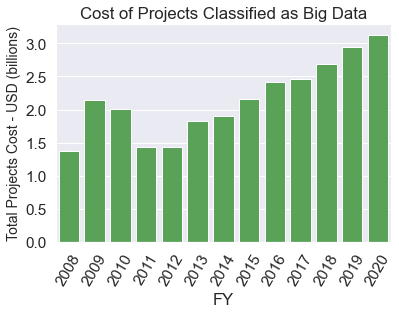

In [22]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots()
sns.barplot(data=dollars_by_year, x='FY', y='COST', color=cb_pal['green'])

#ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=60)

plt.xlabel("FY")
plt.ylabel("Total Projects Cost - USD (billions)", fontsize=14)
plt.title("Cost of Projects Classified as Big Data");

plt.savefig("figures/best_results/big_data_cost_by_yr.png", bbox_inches = "tight")

### TFIDF - KNN

In [ ]:
# Count the number of projects that is Big data related
df_bigdata = df_merge[df_merge['Prediction_KNN']=='Big-data']
print('Number of abstracts related to Big data:', len(df_bigdata))

/tmp/ipykernel_78861/234042915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bigdata["FY"] = df_bigdata["FY"].astype('int')
/tmp/ipykernel_78861/234042915.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


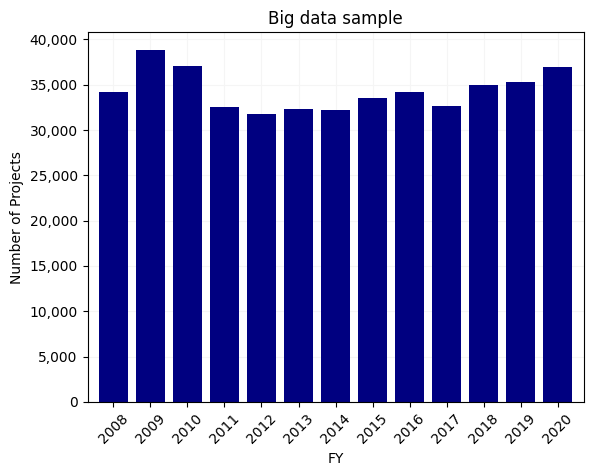

In [27]:
# Distribution over time and agencies
df_bigdata["FY"] = df_bigdata["FY"].astype('int')
year_counts = df_bigdata['FY'].value_counts().sort_index(ascending=True)

# Distribution
year = year_counts.index.tolist()
count = year_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(year, count, color='navy')
#plt.xlim(-0.7, len(year)-0.3)
plt2.xlim(2007.3,2020.7)
plt2.xticks(year, rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt2.xlabel("FY")
plt2.ylabel("Number of Projects")
plt2.title("Big data sample")

plt2.savefig("big_data_time.png", dpi = 800, bbox_inches = "tight")

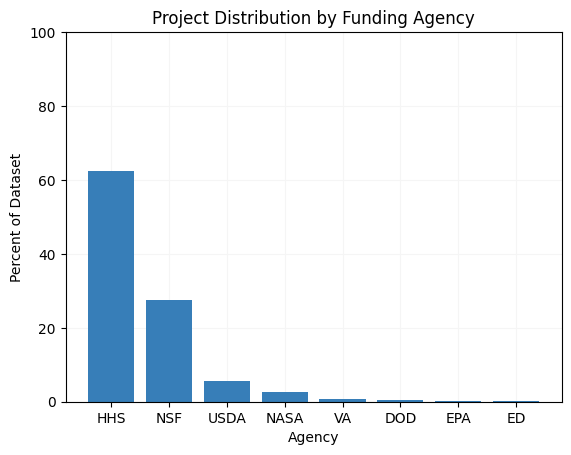

In [28]:
agency_counts = 100*df_bigdata["DEPARTMENT"].value_counts()/len(df_bigdata)
agency = agency_counts.index.tolist()
count = agency_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(agency, count, color='navy')
plt2.ylim(0,100)
plt2.xlabel("Agency")
plt2.ylabel("Percent of Dataset")
plt2.title("Project Distribution by Funding Agency")

plt2.savefig("big_data_agency.png", dpi = 800, bbox_inches = "tight")

#### SVM

In [35]:
# Cross comparision between SVM and KNN
pd.crosstab(df_merge['Prediction_KNN'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_KNN,,,
Big-data,25368,421333,446701
Non Big-data,88,697080,697168
Total,25456,1118413,1143869


### Decision Tree

In [41]:
# Cross comparision between NN and SVM
pd.crosstab(df_merge['Prediction_DT'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_DT,,,
Big-data,18697,117824,136521
Non Big-data,6759,1000589,1007348
Total,25456,1118413,1143869


In [42]:
# Cross comparision between NN and KNN
pd.crosstab(df_merge['Prediction_DT'], df_merge['Prediction_KNN'], margins=True, margins_name="Total")

Prediction_KNN,Big-data,Non Big-data,Total
Prediction_DT,,,
Big-data,87681,48840,136521
Non Big-data,359020,648328,1007348
Total,446701,697168,1143869


### Random Forest

In [48]:
# Cross comparision between RF and DT
pd.crosstab(df_merge['Prediction_RF'], df_merge['Prediction_DT'], margins=True, margins_name="Total")

Prediction_DT,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,27126,36219,63345
Non Big-data,109395,971129,1080524
Total,136521,1007348,1143869


In [49]:
# Cross comparision between RF and SVM
pd.crosstab(df_merge['Prediction_RF'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

Prediction_SVM,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,18586,44759,63345
Non Big-data,6870,1073654,1080524
Total,25456,1118413,1143869


In [67]:
# Cross comparision between RF and SVM
pd.crosstab(df_merge['Prediction_RF'], df_merge['Prediction_KNN'], margins=True, margins_name="Total")

Prediction_KNN,Big-data,Non Big-data,Total
Prediction_RF,,,
Big-data,33750,2183,35933
Non Big-data,336756,771180,1107936
Total,370506,773363,1143869


#### Neural Network

In [ ]:
# Cross comparision between NN and KNN
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_KNN'], margins=True, margins_name="Total")

In [ ]:
# Cross comparision between NN and SVM
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_SVM'], margins=True, margins_name="Total")

In [ ]:
# Cross comparision between NN and DT
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_DT'], margins=True, margins_name="Total")

In [ ]:
# Cross comparision between NN and RF
pd.crosstab(df_merge['Prediction_NN'], df_merge['Prediction_RF'], margins=True, margins_name="Total")

## 1.7. Decision rule based on all classifiers

In [ ]:
# Compute a score to be identify as big data
df_merge = pd.read_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/FR_final_predicted.csv")
df_merge['score'] = np.where(df_merge['Prediction_KNN'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_SVM'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_DT'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_RF'].str.contains("Non Big-data"), 0, 1) + np.where(df_merge['Prediction_NN'].str.contains("Non Big-data"), 0, 1)

In [ ]:
df_merge.head()

In [ ]:
# Distribution of abstracts
df_merge['score'].value_counts()

In [ ]:
# Used a rule (majority votes from classifiers) to identify Big-data abstracts. Useful because we have an impair number of classifier
df_merge['Big_data'] = 0
df_merge.loc[df_merge['score']>3,'Big_data'] = 1
df_merge['Big_data'].value_counts()

In [ ]:
# subset the data to big-data and save
df_bigdata = df_merge[df_merge['Big_data']==1]
#df_bigdata.to_csv("/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/abstracts_classification_big_data.csv")

## Descriptive statistics of our Big data

In [ ]:
# Distribution over time and agencies
df_bigdata["FY"] = df_bigdata["FY"].astype('int')
year_counts = df_bigdata['FY'].value_counts().sort_index(ascending=True)

# Distribution
year = year_counts.index.tolist()
count = year_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(year, count, color='navy')
#plt.xlim(-0.7, len(year)-0.3)
plt2.xlim(2007.3,2020.7)
plt2.xticks(year, rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt2.xlabel("FY")
plt2.ylabel("Number of Projects")
plt2.title("Big Data Sample Over Time \n TFIDF \n")

plt2.savefig("tfidf_big_data_time.png", dpi = 800, bbox_inches = "tight")

In [ ]:
agency_counts = 100*df_bigdata["DEPARTMENT"].value_counts()/len(df_bigdata)
agency = agency_counts.index.tolist()
count = agency_counts.values

fig = plt2.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt2.grid(True, color = "whitesmoke")
plt2.bar(agency, count, color=cb_pal['blue'])
plt2.ylim(0,100)
plt2.xlabel("Agency")
plt2.ylabel("Percent of Dataset")
plt2.title("Project Distribution by Funding Agency \n TFIDF \n")

plt2.savefig("tfidf_big_data_agency.png", dpi = 800, bbox_inches = "tight")